In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('datasheet/ObesityDataSet.csv')
# Membuat work year sebagai index
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Exploratory Data Analysis (EDA)

In [18]:
# Menampilkan 5 baris pertama
print(df.head())

# Informasi umum tentang dataset
print(df.info())

# Statistik deskriptif
print(df.describe())

# Cek missing values
print(df.isnull().sum())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [42]:
df["NObeyesdad"].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

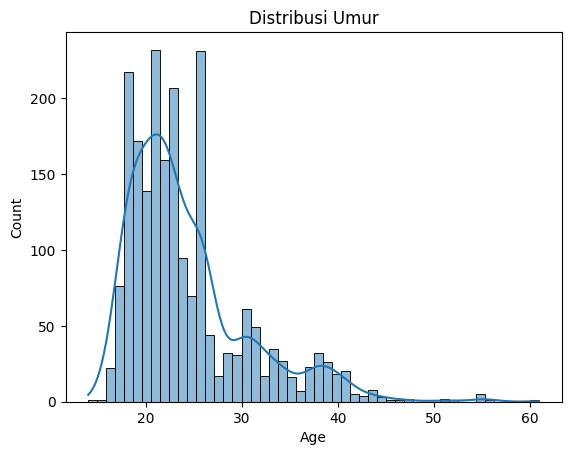

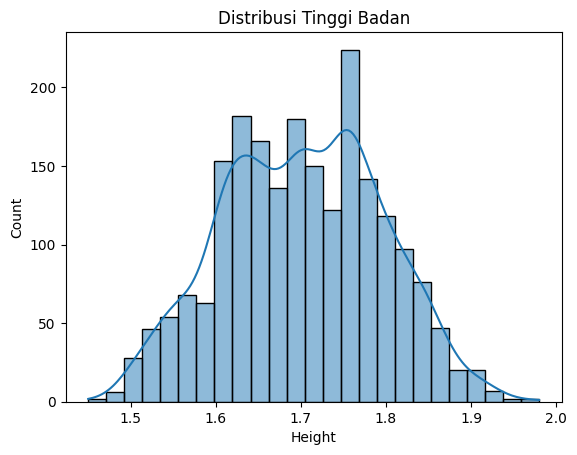

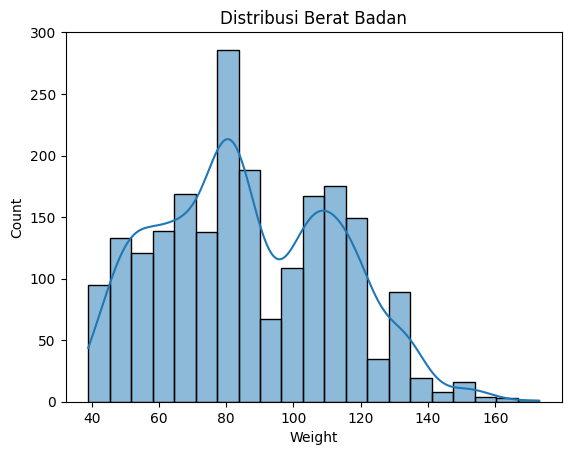

In [19]:
# Distribusi umur
sns.histplot(df['Age'], kde=True)
plt.title('Distribusi Umur')
plt.show()

# Distribusi tinggi badan
sns.histplot(df['Height'], kde=True)
plt.title('Distribusi Tinggi Badan')
plt.show()

# Distribusi berat badan
sns.histplot(df['Weight'], kde=True)
plt.title('Distribusi Berat Badan')
plt.show()

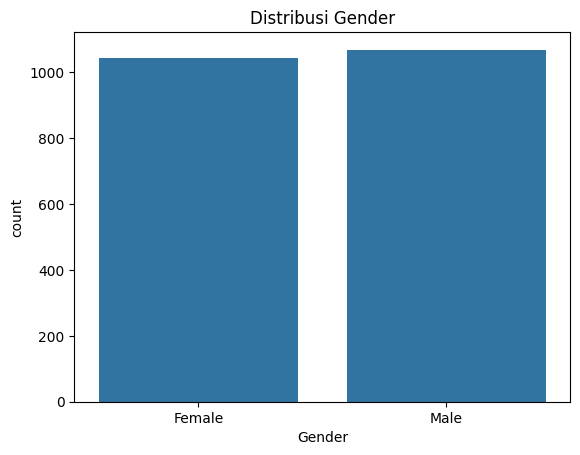

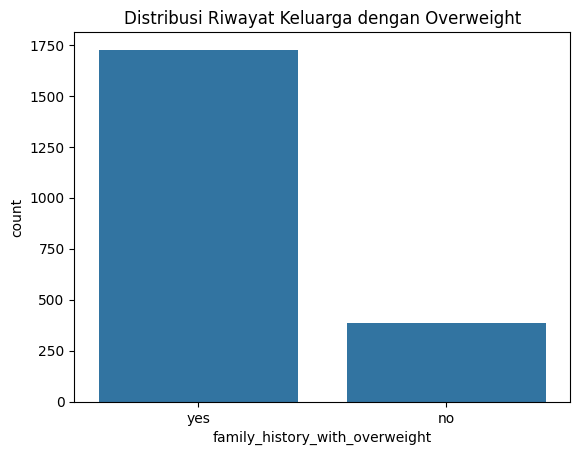

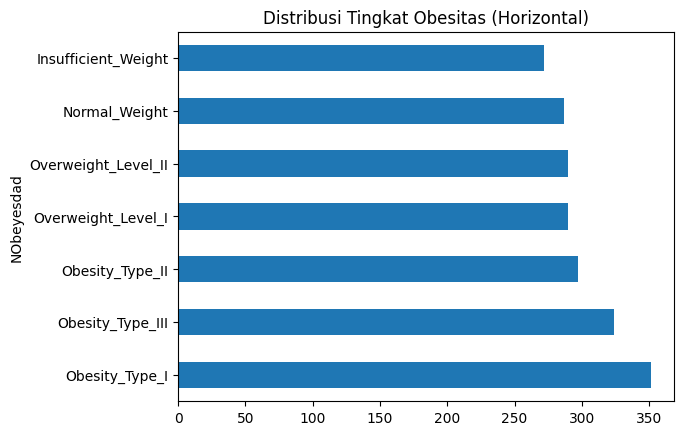

In [ ]:
# Distribusi gender
sns.countplot(x='Gender', data=df)
plt.title('Distribusi Gender')
plt.show()

# Distribusi riwayat keluarga dengan overweight
sns.countplot(x='family_history_with_overweight', data=df)
plt.title('Distribusi Riwayat Keluarga dengan Overweight')
plt.show()

df['NObeyesdad'].value_counts().plot(kind='barh')  # Plot horizontal
plt.title('Distribusi Tingkat Obesitas (Horizontal)')
plt.show()

C:\Users\EZZRA\AppData\Local\Temp\ipykernel_23992\765687132.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = df.groupby('Height_Range', as_index=False)['Weight'].mean()
C:\Users\EZZRA\AppData\Local\Temp\ipykernel_23992\765687132.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Height_Range', y='Weight', data=df_avg, palette=sns.color_palette("husl", len(df_avg)))


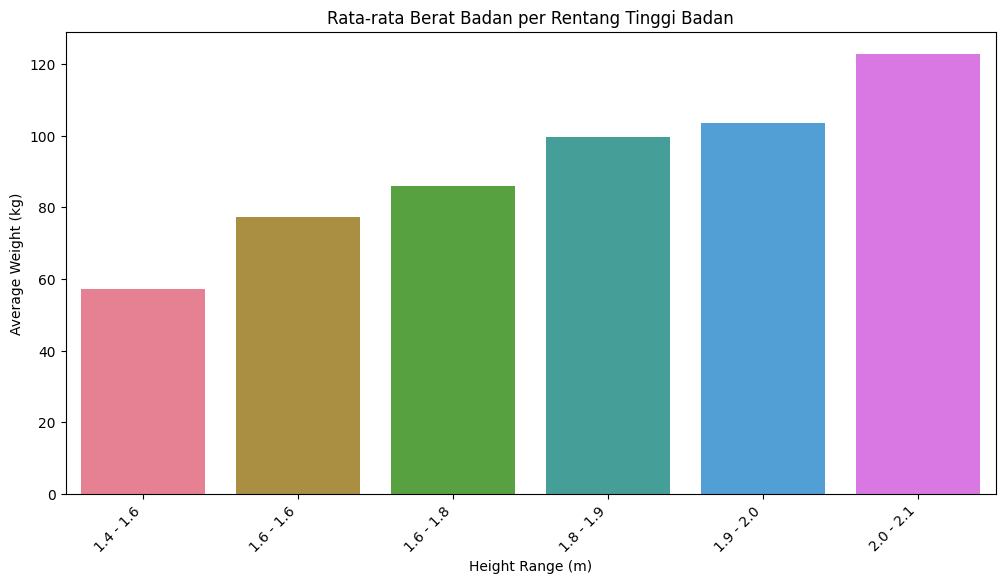

In [52]:
# Scatter plot antara tinggi dan berat badan
bins = np.arange(df['Height'].min(), df['Height'].max() + 0.1, 0.1)
labels = [f"{round(bins[i], 1)} - {round(bins[i+1], 1)}" for i in range(len(bins) - 1)]

df['Height_Range'] = pd.cut(df['Height'], bins=bins, labels=labels, include_lowest=True)

df_avg = df.groupby('Height_Range', as_index=False)['Weight'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Height_Range', y='Weight', data=df_avg, palette=sns.color_palette("husl", len(df_avg)))

plt.title('Rata-rata Berat Badan per Rentang Tinggi Badan')
plt.xlabel('Height Range (m)')
plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=45, ha="right") 

plt.show()




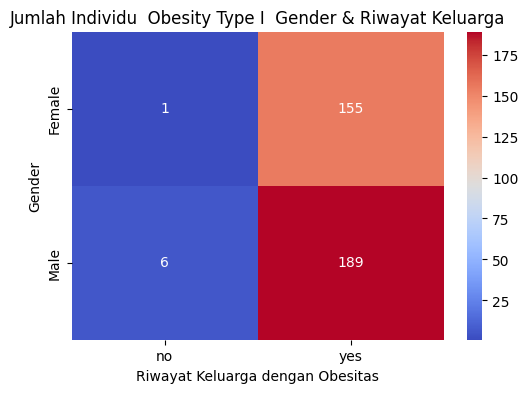

In [44]:

# Filter untuk Obesity_Type_I
df_obesity_I = df[df["NObeyesdad"] == "Obesity_Type_I"]

# Buat pivot table
pivot_obesity_I = df_obesity_I.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_obesity_I, annot=True, cmap="coolwarm", fmt=".0f")

# Tambahkan judul dan label
plt.title("Jumlah Individu  Obesity Type I  Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


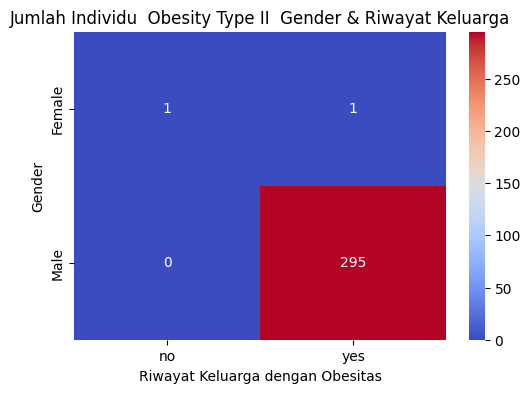

In [45]:
# Filter untuk Obesity_Type_II
df_obesity_II = df[df["NObeyesdad"] == "Obesity_Type_II"]

# Buat pivot table
pivot_obesity_II = df_obesity_II.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_obesity_II, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu  Obesity Type II  Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


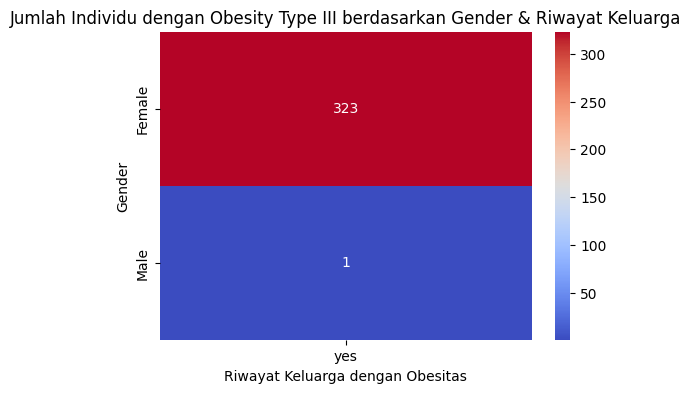

In [46]:
# Filter untuk Obesity_Type_III
df_obesity_III = df[df["NObeyesdad"] == "Obesity_Type_III"]

# Buat pivot table
pivot_obesity_III = df_obesity_III.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_obesity_III, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu dengan Obesity Type III berdasarkan Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


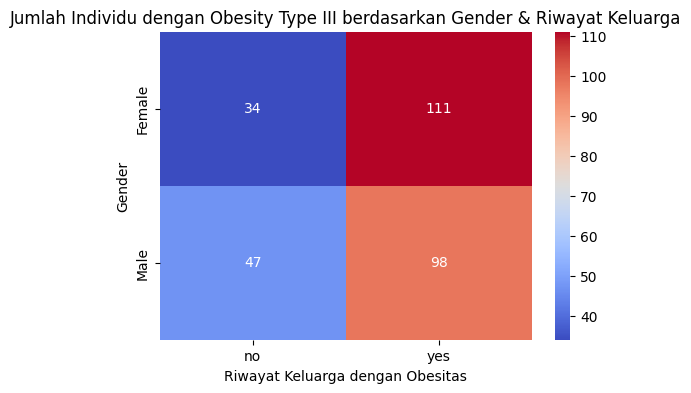

In [47]:
# Filter untuk Overweight_Level_I
df_obesity_III = df[df["NObeyesdad"] == "Overweight_Level_I"]

# Buat pivot table
pivot_obesity_III = df_obesity_III.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_obesity_III, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu dengan Obesity Type III berdasarkan Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


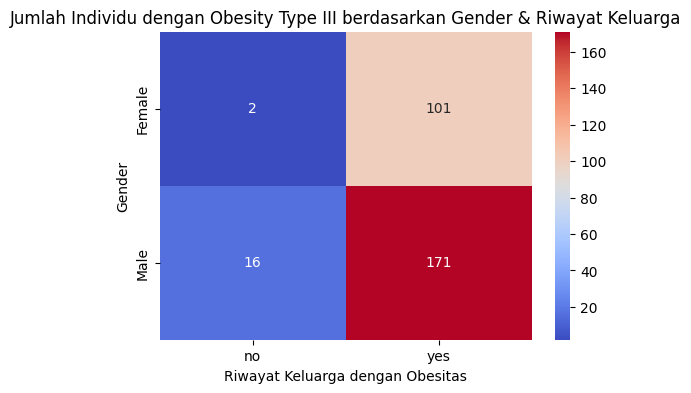

In [48]:
# Filter untuk Overweight_Level_II
df_obesity_III = df[df["NObeyesdad"] == "Overweight_Level_II"]

# Buat pivot table
pivot_obesity_III = df_obesity_III.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_obesity_III, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu dengan Obesity Type III berdasarkan Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


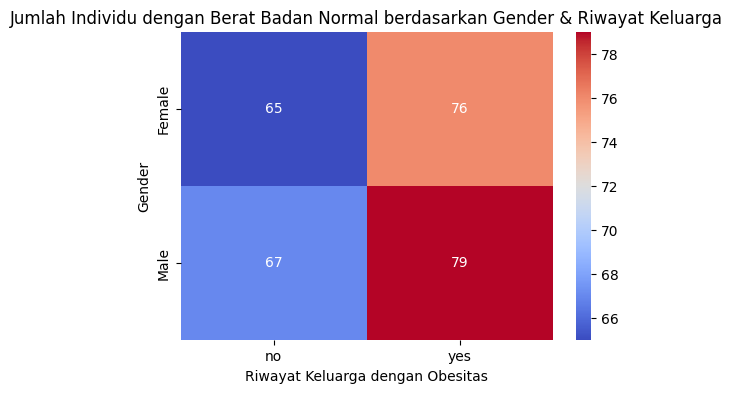

In [49]:
# Filter untuk Normal Weight
df_normal = df[df["NObeyesdad"] == "Normal_Weight"]

# Buat pivot table
pivot_normal = df_normal.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_normal, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu dengan Berat Badan Normal berdasarkan Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


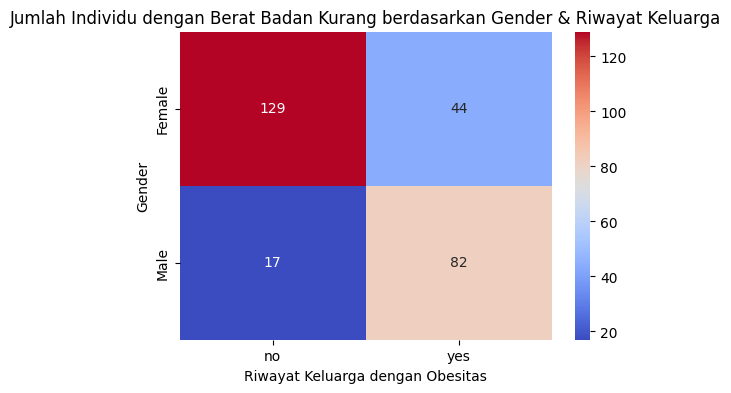

In [50]:
# Filter untuk Insufficient Weight
df_underweight = df[df["NObeyesdad"] == "Insufficient_Weight"]

# Buat pivot table
pivot_underweight = df_underweight.pivot_table(index="Gender", columns="family_history_with_overweight", aggfunc="size", fill_value=0)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_underweight, annot=True, cmap="coolwarm", fmt=".0f")

plt.title("Jumlah Individu dengan Berat Badan Kurang berdasarkan Gender & Riwayat Keluarga")
plt.xlabel("Riwayat Keluarga dengan Obesitas")
plt.ylabel("Gender")

plt.show()


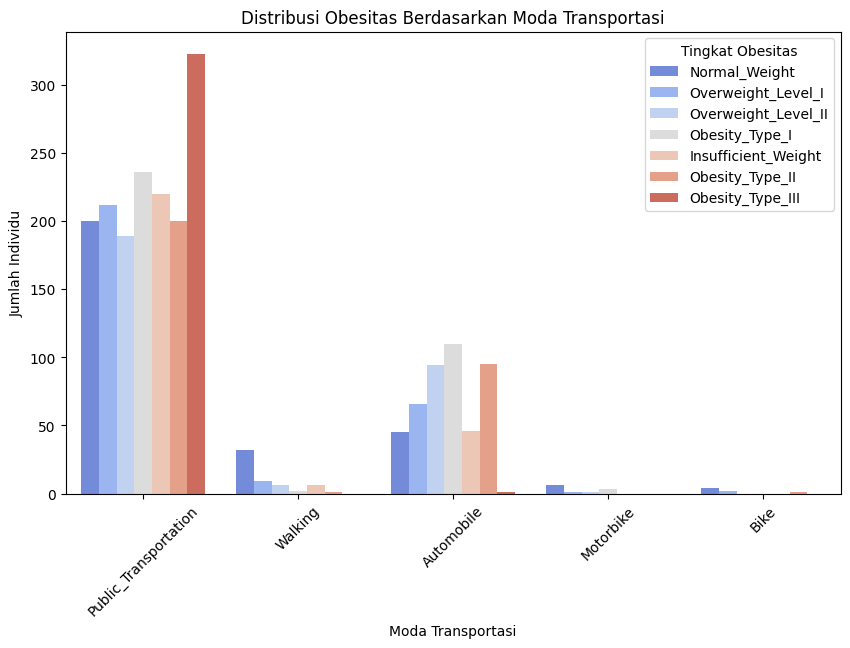

In [ ]:
# Plot countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=df["MTRANS"], hue=df["NObeyesdad"], palette="coolwarm")
plt.title("Distribusi Obesitas Berdasarkan Modal Transportasi")
plt.xlabel("Moda Transportasi")
plt.ylabel("Jumlah Individu")
plt.xticks(rotation=45)
plt.legend(title="Tingkat Obesitas")
plt.show()

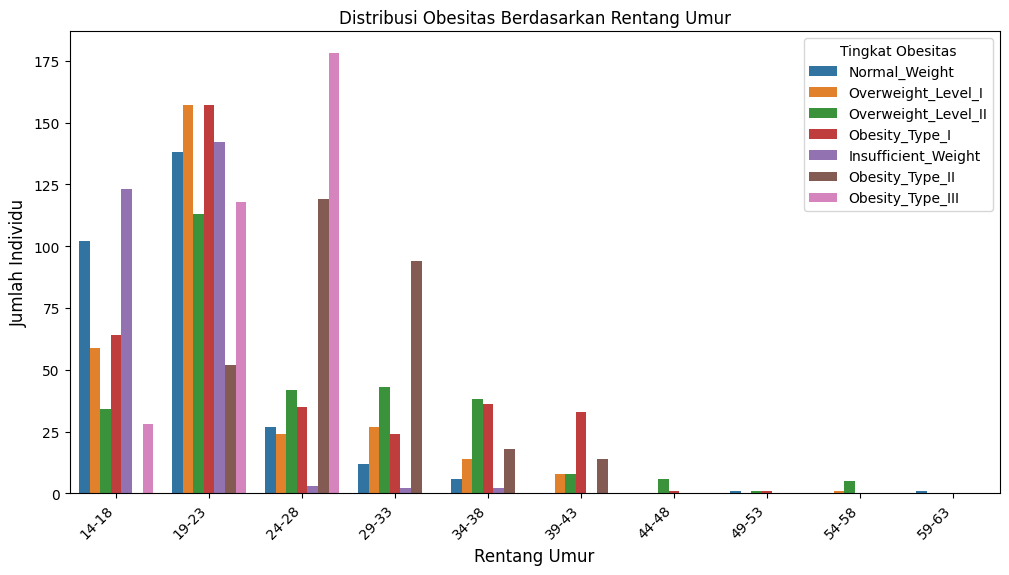

In [68]:
# Menentukan rentang umur berdasarkan Age Min + 5
age_min = df["Age"].min()
age_max = df["Age"].max()

# Membuat interval umur setiap 5 tahun
bins = np.arange(age_min, age_max + 5, 5)
labels = [f"{int(bins[i])}-{int(bins[i+1])-1}" for i in range(len(bins)-1)]

# Menambahkan kategori umur ke dataset
df["Age_Range"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

# Plot countplot
plt.figure(figsize=(12, 6))
sns.countplot(x=df["Age_Range"], hue=df["NObeyesdad"])

# Menambahkan judul dan label
plt.title("Distribusi Obesitas Berdasarkan Rentang Umur")
plt.xlabel("Rentang Umur", fontsize=12)
plt.ylabel("Jumlah Individu", fontsize=12)

# Rotasi label sumbu X agar tidak bertumpuk
plt.xticks(rotation=45, ha="right")

# Menampilkan legend di luar plot agar lebih jelas
plt.legend(title="Tingkat Obesitas", bbox_to_anchor=(1, 1))

# Tampilkan Plot
plt.show()


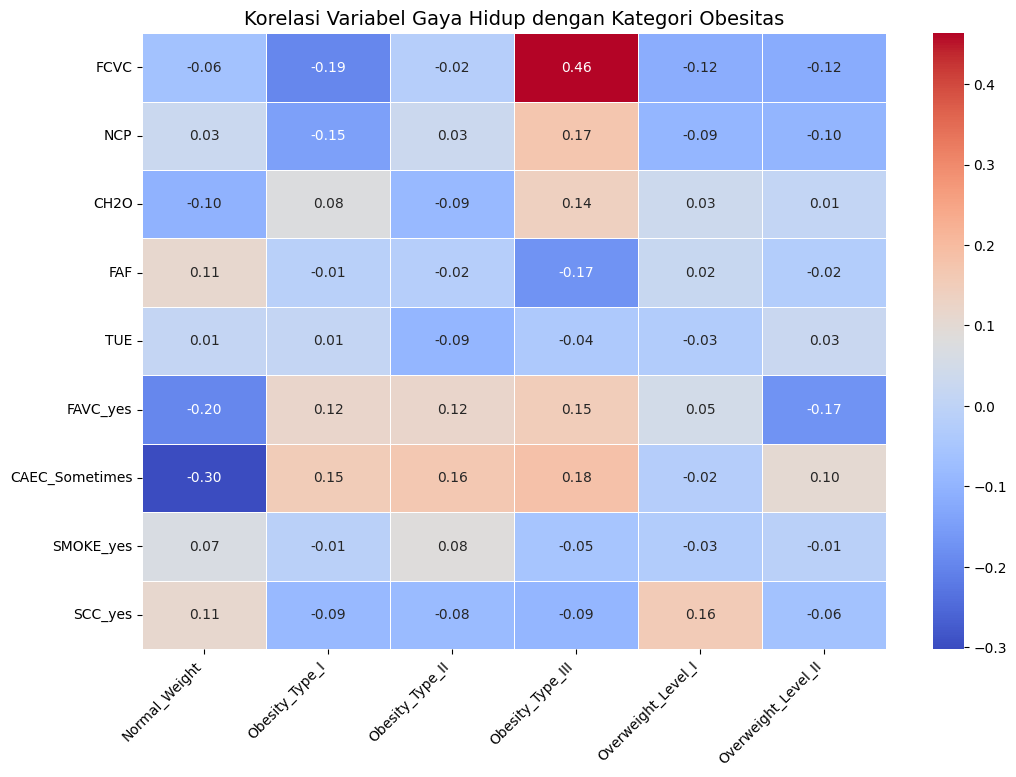

In [95]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kategori obesitas menjadi nilai numerik (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["NObeyesdad", "FAVC", "CAEC", "SMOKE", "SCC"], drop_first=True)

# Pastikan semua variabel non-numerik telah diubah
features = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]  # Variabel numerik langsung
categorical_features = ["FAVC_yes", "CAEC_Sometimes", "SMOKE_yes", "SCC_yes"]  # Dari One-Hot Encoding
obesity_types = [col for col in df_encoded.columns if "NObeyesdad" in col]  # Semua kategori obesitas

# Ubah nama kolom obesitas supaya lebih singkat
rename_dict = {col: col.replace("NObeyesdad_", "") for col in obesity_types}
df_encoded.rename(columns=rename_dict, inplace=True)

# Gabungkan semua fitur untuk korelasi
all_features = features + categorical_features + list(rename_dict.values())

# Buat korelasi antara faktor gaya hidup dan obesitas
correlation_matrix = df_encoded[all_features].corr()

# Ambil subset korelasi antara faktor gaya hidup dan obesitas
correlation_subset = correlation_matrix.loc[features + categorical_features, list(rename_dict.values())]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Buat label X dan Y agak miring
plt.xticks(rotation=45, ha="right")  # Miringkan label sumbu X ke kanan
plt.yticks(rotation=0)  # Biarkan label Y tetap horizontal

# Tambahkan judul
plt.title("Korelasi Variabel Gaya Hidup dengan Kategori Obesitas", fontsize=14)

# Tampilkan heatmap
plt.show()


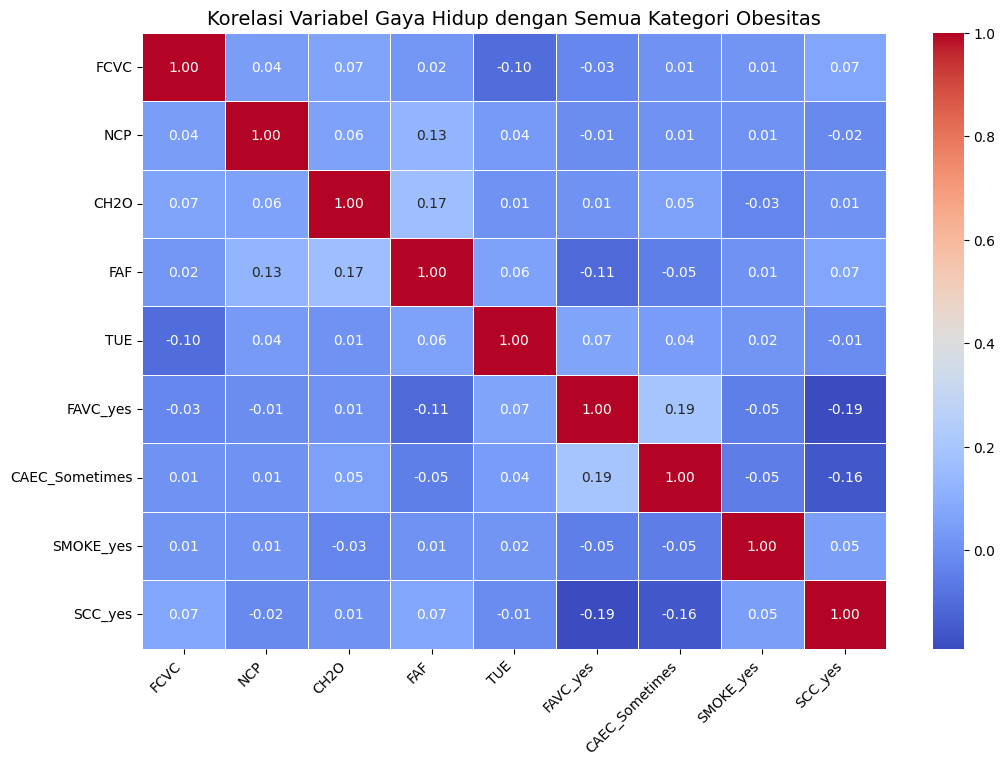

In [101]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Konversi kategori obesitas menjadi nilai numerik (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=["NObeyesdad", "FAVC", "CAEC", "SMOKE", "SCC"], drop_first=True)

# Pastikan semua variabel non-numerik telah diubah
features = ["FCVC", "NCP", "CH2O", "FAF", "TUE"]  # Variabel numerik langsung
categorical_features = ["FAVC_yes", "CAEC_Sometimes", "SMOKE_yes", "SCC_yes"]  # Dari One-Hot Encoding

# Gabungkan semua fitur untuk korelasi
all_features = features + categorical_features 

# Buat korelasi antara fitur dengan kategori obesitas
correlation_matrix = df_encoded[all_features].corr()

# Ambil subset korelasi antara faktor gaya hidup dan obesitas
correlation_subset = correlation_matrix.loc[features + categorical_features]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Buat label X dan Y agak miring
plt.xticks(rotation=45, ha="right")  # Miringkan label sumbu X ke kanan
plt.yticks(rotation=0)  # Biarkan label Y tetap horizontal

# Tambahkan judul
plt.title("Korelasi Variabel Gaya Hidup dengan Semua Kategori Obesitas", fontsize=14)

# Tampilkan heatmap
plt.show()
